In [1]:

from ucimlrepo import fetch_ucirepo, list_available_datasets
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.utils.validation import column_or_1d
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import category_encoders as ce

In [2]:

diabetes = fetch_ucirepo(id=296)

C:\Users\Daniel\anaconda3\Lib\site-packages\ucimlrepo\fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [3]:
X = diabetes.data.features 
y = diabetes.data.targets 


In [4]:
X.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,No,Steady,No,No,No,No,No,Ch,Yes


In [5]:
y.head()

,readmitted
0,NO
1,>30
2,NO
3,NO
4,NO


<Axes: >

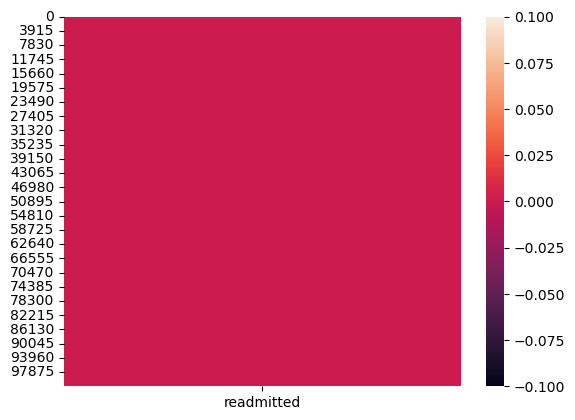

In [6]:
#use seaborne to visualize all null values
sns.heatmap(y.isnull())

C:\Users\Daniel\AppData\Local\Temp\ipykernel_26824\1100754634.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'readmitted', data = y, palette = 'Set1')


<Axes: xlabel='readmitted', ylabel='count'>

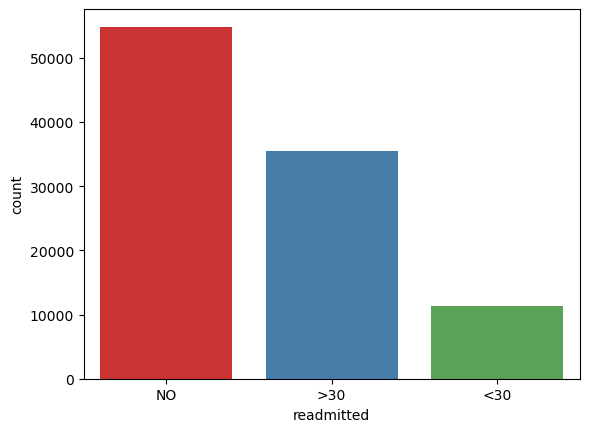

In [7]:
#visualize output variable
sns.countplot(x = 'readmitted', data = y, palette = 'Set1')

In [8]:
#change the categorical variables to a format suitable for a Linear Regression model 
#convert categorical features to dummy variables
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      99493 non-null   object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   weight                    3197 non-null    object
 4   admission_type_id         101766 non-null  int64 
 5   discharge_disposition_id  101766 non-null  int64 
 6   admission_source_id       101766 non-null  int64 
 7   time_in_hospital          101766 non-null  int64 
 8   payer_code                61510 non-null   object
 9   medical_specialty         51817 non-null   object
 10  num_lab_procedures        101766 non-null  int64 
 11  num_procedures            101766 non-null  int64 
 12  num_medications           101766 non-null  int64 
 13  number_outpatient         101766 non-null  int64 
 14  numb

In [9]:
max_glu_serum = pd.get_dummies(X['max_glu_serum'],drop_first = True)           
A1Cresult =  pd.get_dummies(X['A1Cresult'],drop_first = True)                 
metformin =  pd.get_dummies(X['metformin'],drop_first = True)               
repaglinide =  pd.get_dummies(X['repaglinide'],drop_first = True)              
nateglinide =  pd.get_dummies(X['nateglinide'],drop_first = True)             
chlorpropamide =  pd.get_dummies(X['chlorpropamide'],drop_first = True)           
glimepiride = pd.get_dummies(X['glimepiride'],drop_first = True)               
acetohexamide =  pd.get_dummies(X['acetohexamide'],drop_first = True)            
glipizide = pd.get_dummies(X['glipizide'],drop_first = True)                 
glyburide = pd.get_dummies(X['glyburide'],drop_first = True)                
tolbutamide = pd.get_dummies(X['tolbutamide'],drop_first = True)               
pioglitazone =  pd.get_dummies(X['pioglitazone'],drop_first = True)             
rosiglitazone =  pd.get_dummies(X['rosiglitazone'],drop_first = True)            
acarbose = pd.get_dummies(X['acarbose'],drop_first = True)                  
miglitol = pd.get_dummies(X['miglitol'],drop_first = True)                 
troglitazone = pd.get_dummies(X['troglitazone'],drop_first = True)              
tolazamide =  pd.get_dummies(X['tolazamide'],drop_first = True)               
examide = pd.get_dummies(X['examide'],drop_first = True)                   
citoglipton =  pd.get_dummies(X['citoglipton'],drop_first = True)              
insulin =   pd.get_dummies(X['insulin'],drop_first = True)                 
glyburide_metformin = pd.get_dummies(X['glyburide-metformin'],drop_first = True)       
glipizide_metformin = pd.get_dummies(X['glipizide-metformin'],drop_first = True)       
glimepiride_pioglitazone = pd.get_dummies(X['glimepiride-pioglitazone'],drop_first = True)  
metformin_rosiglitazone =  pd.get_dummies(X['metformin-rosiglitazone'],drop_first = True)  
metformin_pioglitazone = pd.get_dummies(X['metformin-pioglitazone'],drop_first = True) 
race = pd.get_dummies(X['race'],drop_first = True) 
gender = pd.get_dummies(X['gender'],drop_first = True) 
age = pd.get_dummies(X['age'],drop_first = True) 
weight = pd.get_dummies(X['weight'],drop_first = True) 
change = pd.get_dummies(X['change'],drop_first = True)
diag_1 = pd.get_dummies(X['diag_1'],drop_first = True)
diag_2 = pd.get_dummies(X['diag_2'],drop_first = True)
diag_3 = pd.get_dummies(X['diag_3'],drop_first = True)

In [10]:
#create empty data frame
df = pd.DataFrame()
df = pd.concat([df, max_glu_serum, A1Cresult, metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide,
               glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide,
               examide, citoglipton, insulin, glyburide_metformin, glipizide_metformin,glimepiride_pioglitazone, 
                metformin_rosiglitazone, metformin_pioglitazone, race, gender, age, weight, change, diag_1, diag_2, diag_3 ], axis =1)

In [11]:
#check new columns
print(df.columns)

Index(['>300', 'Norm', '>8', 'Norm', 'No', 'Steady', 'Up', 'No', 'Steady',
       'Up',
       ...
       'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V70', 'V72', 'V85', 'V86'],
      dtype='object', length=2326)


In [12]:
labels = pd.DataFrame(y)
labels.readmitted[labels.readmitted =='>30'] = 2
labels.readmitted[labels.readmitted =='<30'] = 1
labels.readmitted[labels.readmitted =='NO'] = 0

C:\Users\Daniel\AppData\Local\Temp\ipykernel_26824\104300150.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  labels.readmitted[labels.readmitted =='>30'] = 2
C:\Users\Daniel\AppData\Local\Temp\ipykernel_26824\104300150.py:3: FutureWarnin

In [13]:
df = df.apply(pd.to_numeric)
labels = labels.apply(pd.to_numeric)

In [14]:
#split our data into training data sets and test data sets
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size = 0.3, random_state = 0)

In [15]:
#train our model and make predictions
logmodel = LogisticRegression(multi_class='multinomial', solver='lbfgs',class_weight = 'balanced', max_iter=20000)
y_train = column_or_1d(y_train, warn=True)
y_train = y_train.ravel()
logmodel.fit(X_train, y_train)
predictions_log = logmodel.predict(X_test)

C:\Users\Daniel\AppData\Local\Temp\ipykernel_26824\2183918548.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_train = column_or_1d(y_train, warn=True)
C:\Users\Daniel\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [16]:
accuracy = accuracy_score(y_test, predictions_log)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n",classification_report(y_test, predictions_log))

Accuracy: 0.43

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.48      0.54     16426
           1       0.15      0.38      0.21      3422
           2       0.42      0.38      0.40     10682

    accuracy                           0.43     30530
   macro avg       0.40      0.41      0.39     30530
weighted avg       0.51      0.43      0.46     30530



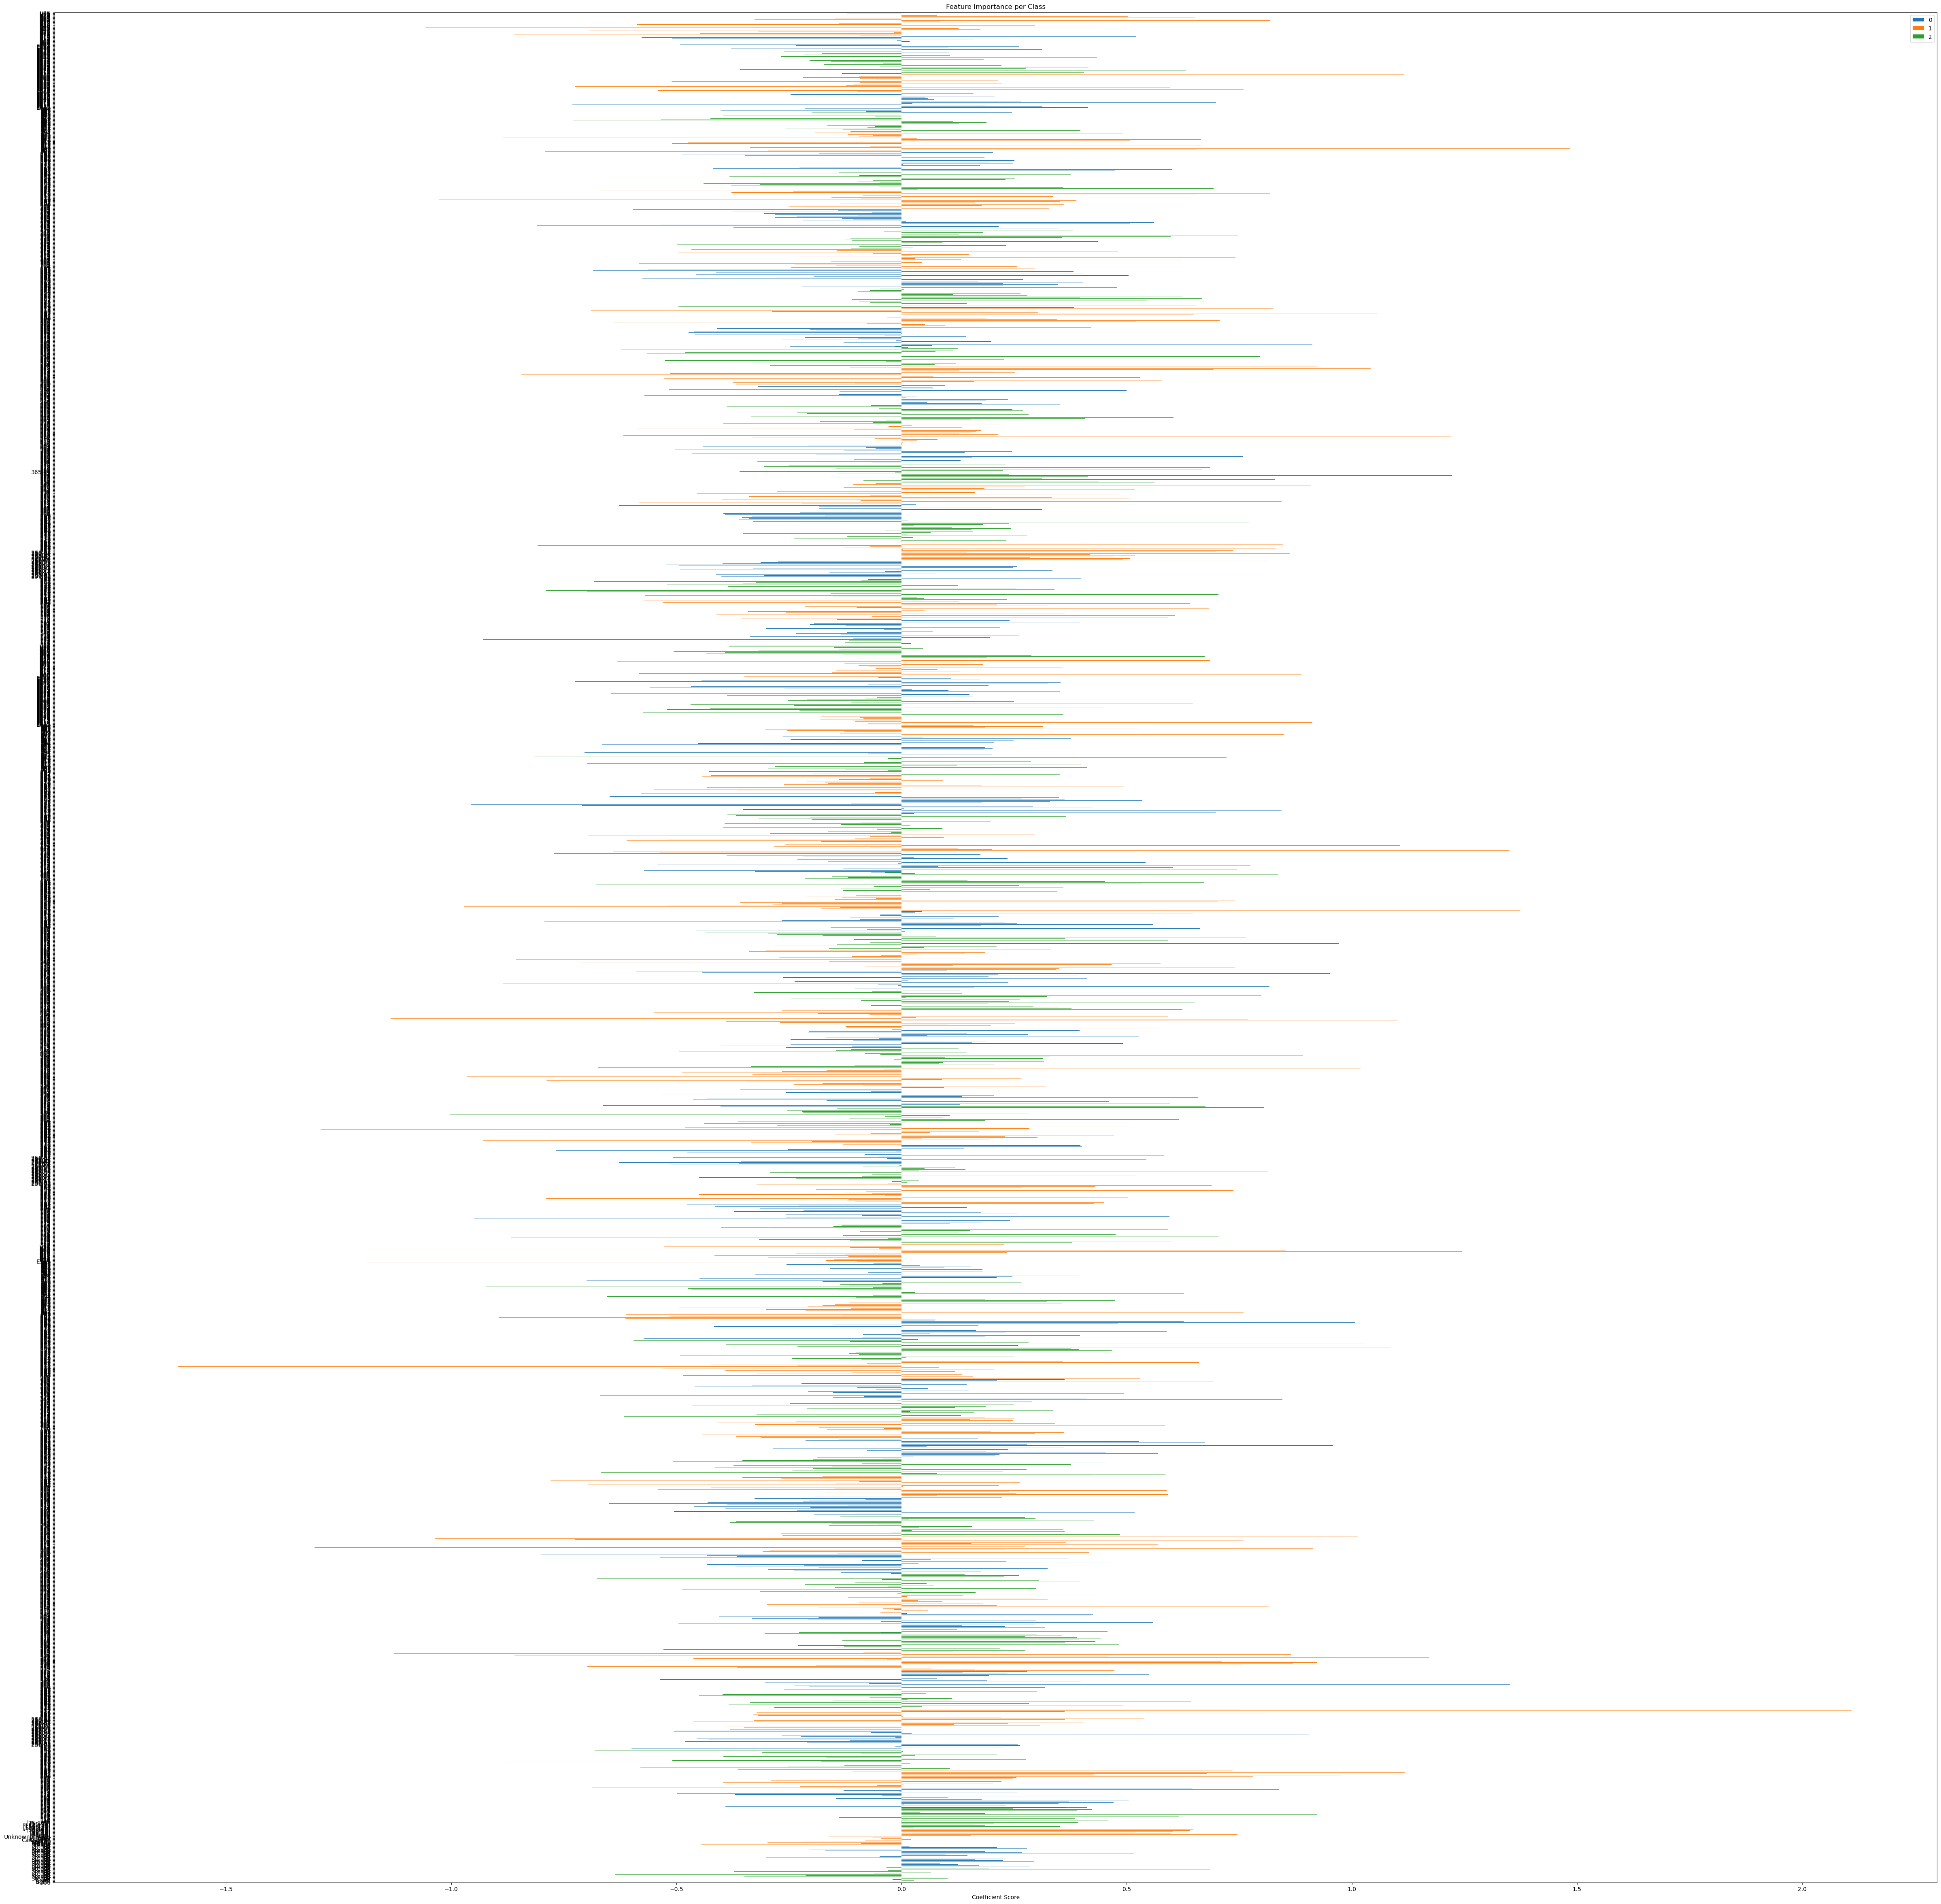

In [17]:
#individual coefficient score
#importance = logmodel.coef_.flatten()
#print(importance)
#pyplot.rcParams['figure.figsize'] = (10,10)
#pyplot.barh(importance, color = 'g')
#pyplot.title('Barplot summary of feature importance')
#pyplot.xlabel('score')
#pyplot.show()
# Coefficients for all classes (shape = 3 x n_features)
coef_matrix = pd.DataFrame(logmodel.coef_, columns=X_train.columns, 
                           index=logmodel.classes_)

# Transpose for easier plotting
coef_matrix.T.plot(kind="barh", figsize=(60, 60))
pyplot.title("Feature Importance per Class")
pyplot.xlabel("Coefficient Score")
pyplot.show()

In [18]:
col_names = df.copy()
ordinal_encoder = ce.OrdinalEncoder()
X_train_forest = X_train.copy()
X_test_forest = X_test.copy()
y_train_forest = y_train.copy()
y_test_forest = y_test.copy()
# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_forest, y_train_forest)

# Predict
y_pred_forest = rf.predict(X_test_forest)
accuracy = accuracy_score(y_test_forest, y_pred_forest)
classification_rep = classification_report(y_test_forest, y_pred_forest)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.54

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.82      0.67     16426
           1       0.20      0.02      0.04      3422
           2       0.43      0.26      0.33     10682

    accuracy                           0.54     30530
   macro avg       0.40      0.37      0.35     30530
weighted avg       0.48      0.54      0.48     30530

